In [1]:
1+1

2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# from pyspark.sql import SparkSession
beers = pd.read_csv('beers-breweries-and-beer-reviews/beers.csv')
breweries = pd.read_csv('beers-breweries-and-beer-reviews/breweries.csv')
reviews = pd.read_csv('beers-breweries-and-beer-reviews/reviews.csv')

In [3]:
reviews['text'] = reviews['text'].replace(u'\xa0\xa0', '')
# subset to only reviews that have a text review
text_reviews = reviews.loc[reviews['text'] != '']
# subset data to exclude NaN's as well (only losing 164k reviews from the last subset)
text_no_nan = text_reviews.loc[text_reviews.smell.isna() == False]
# rename column name beer_id to id for easy joining
text_no_nan = text_no_nan.rename(columns={'beer_id':'id'})
# subset out retired beers
current_beers = beers.loc[beers['retired'] == 'f']
# merge text_no_nan with beers that are not retired
df = pd.merge(text_no_nan, current_beers, on='id')
# create a table with average ratings for each beer. Index/ID is the beer id
ratings = pd.DataFrame(df.groupby('id')['score'].mean())
# add a column tallying the # of reviews for that beer
ratings['no_of_ratings'] = df.groupby('id')['score'].count()
# subset ratings with only beers that have 10+ ratings
ratings = ratings.loc[ratings['no_of_ratings'] > 9]
# formatting
ratings = ratings.reset_index()
ratings = ratings.rename(columns={'score':'avg_score'})
# rejoin no of ratings onto df
df = df.merge(ratings, how='inner', on='id')
# make a dataframe of reviewers by usename, count the number of reviews they made
reviewers = pd.DataFrame(df.groupby('username')['id'].count())
# make a new feature, the average of all of their scores
reviewers['avg_usr_score'] = df.groupby('username')['score'].mean()
# subset reviewers to those with 5+ reviews. From 73k users to 25k.
reviewers = reviewers.loc[reviewers['id'] > 4] ## MAYBE I CAN PLAY WITH THIS #
# formatting 
reviewers = reviewers.rename(columns={'id':'tot_usr_rvw'})

In [4]:
# there's ~1400 users outsides of 2 STDs of the mean score, will subset them out
reviewers_sub = reviewers.loc[(reviewers['avg_usr_score'] >= 3.182) &\
                              (reviewers['avg_usr_score'] <= 4.665)]

# subset of df with beers that have 10+ reviews, and with reviewers that have 5+ reviews
# and an average rating of beers between 3.18 and 4.67
df_with_mins = df.merge(reviewers_sub, how = 'inner', on = 'username')

In [14]:
df_all_users = df.merge(reviewers, how = 'inner', on = 'username')

In [8]:
reviews.loc[reviews['text'] == '']

,beer_id,username,date,text,look,smell,taste,feel,overall,score
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
5,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91
6,125646,yummybeer,2017-12-19,,4.75,4.50,4.75,4.75,4.75,4.69
8,125646,wwoj,2017-12-16,,5.00,4.75,4.50,4.50,4.50,4.59
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


In [11]:
# subset to only reviews that have a text review
text_reviews = reviews.loc[reviews['text'] != '']

In [13]:
# subset data to exclude NaN's as well (only losing 164k reviews from the last subset)
text_no_nan = text_reviews.loc[text_reviews.smell.isna() == False]

In [17]:
text_no_nan = text_no_nan.rename(columns={'beer_id':'id'})

In [23]:
current_beers = beers.loc[beers['retired'] == 'f']

In [77]:
# merge text_no_nan with beers that are not retired
df = pd.merge(text_no_nan, current_beers, on='id')

In [79]:
df.shape

(2265731, 19)

In [66]:
# create a table with average ratings for each beer. Index/ID is the beer id
ratings = pd.DataFrame(df.groupby('id')['score'].mean())
ratings

,score
id,
5,3.389863
6,3.643678
7,3.235484
9,3.087823
10,3.797290
...,...
372728,3.860000
372836,4.090000
372842,4.500000


In [67]:
# add a column tallying the # of reviews for that beer
ratings['no_of_ratings'] = df.groupby('id')['score'].count()

In [68]:
# subset of only beers with 10+ reviews
ratings = ratings.loc[ratings['no_of_ratings'] > 9]

ratings2 = ratings.loc[ratings['no_of_ratings'] > 49]

In [ ]:
ratings = ratings.reset_index()

In [72]:
ratings = ratings.rename(columns={'score':'avg_score'})

In [80]:
# rejoin no of ratings onto df
df = df.merge(ratings, how='inner', on='id')

In [82]:
# looks like we lost approx 200k reviews by filtering out beers that had less than 10
df.shape

(2061128, 21)

In [89]:
reviewers = pd.DataFrame(df.groupby('username')['id'].count())

In [107]:
reviewers['avg_usr_score'] = df.groupby('username')['score'].mean()

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
# subset reviewers to those with 5+ reviews. From 73k users to 25k.
reviewers = reviewers.loc[reviewers['id'] > 4]

In [112]:
reviewers = reviewers.rename(columns={'id':'tot_usr_rvw'})

### Might need to eliminate reviewers that rate extremely outside the norm (under 2.5, or 5.0?)

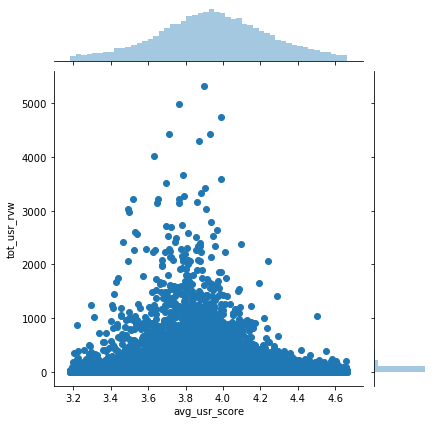

In [184]:
# plotting no of reviews vs average score for that user. Should we eliminate those that have
# an average rating of 2.5 or below?
sns.jointplot(x='avg_usr_score', y='tot_usr_rvw', data = reviewers_sub)

In [118]:
reviewers.sort_values('avg_usr_score')

,tot_usr_rvw,avg_usr_score
username,,
BeerDrinker2020,8,1.54625
Marti403,10,1.57200
BlueTomorrow,5,1.82200
Tcusack,5,1.88400
SGT_Gump,15,1.98200
...,...,...
MikeLaw,5,5.00000
Msussman328,5,5.00000
goldenbooter,30,5.00000


In [155]:
reviewer_std = reviewers['avg_usr_score'].std()

In [154]:
reviewer_mean = reviewers['avg_usr_score'].mean()

In [167]:
reviewer_mean + (reviewer_std*2)

4.665364922755495

In [168]:
reviewer_mean - (reviewer_std*2)

3.182074467686265

In [163]:
# there's ~1400 users outsides of 2 STDs of the mean score, will subset them out
reviewers_sub = reviewers.loc[(reviewers['avg_usr_score'] >= 3.182) & (reviewers['avg_usr_score'] <= 4.665)]

In [160]:
reviews.loc[reviews['username'] == 'BeerDrinker2020']

,id,username,date,text,look,smell,taste,feel,overall,score
1046455,102,BeerDrinker2020,2018-08-11,"Racid, chemical smell and taste. Bad batch?",1.5,1.0,1.0,1.25,1.0,1.06
1058947,103,BeerDrinker2020,2018-08-11,"Like a flu shot that misses its mark, this ...",1.0,1.0,1.0,1.00,1.0,1.00
1069263,104,BeerDrinker2020,2018-08-11,Not worth the money. They have lost their t...,1.5,1.0,1.0,1.25,1.0,1.06
3149565,1503,BeerDrinker2020,2018-08-11,This company aspires to mediocrity.,1.0,1.0,1.0,1.00,1.0,1.00
3175158,57252,BeerDrinker2020,2018-08-11,Poor excuse for an IPA,1.0,1.0,1.0,1.00,1.0,1.00
4314284,14309,BeerDrinker2020,2018-08-11,Had high expectations for this and was disa...,2.0,2.0,1.0,1.00,1.0,1.30
6091749,30282,BeerDrinker2020,2018-08-11,"Great beer. Very high alcohol content, but ...",5.0,5.0,5.0,4.50,5.0,4.95
7480478,95386,BeerDrinker2020,2018-08-11,so many better options...,1.0,1.0,1.0,1.00,1.0,1.00


In [136]:
beers.loc[beers['id'] == 95386]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
233743,95386,Samuel Adams Rebel IPA,35,MA,US,American IPA,Rotating,6.5,COLOR Bright Copper / 11 SRM,f


### ^^^ This guy does NOT like samuel adams

In [137]:
reviews.loc[reviews['username'] == 'Marti403']

,id,username,date,text,look,smell,taste,feel,overall,score
927484,65,Marti403,2012-02-15,Don't care for Budweiser at all. Looks dark...,1.5,1.5,1.0,1.0,1.0,1.15
1274736,1253,Marti403,2012-02-15,"I'm not sure why, but this is my favorite B...",2.0,2.0,2.5,2.0,2.0,2.20
1556128,332,Marti403,2012-02-15,"Not much of an appearance with about a 1"" h...",1.5,1.5,1.5,1.5,1.5,1.50
1830591,580,Marti403,2012-02-15,What do you do when 75 cent busch light bot...,2.5,2.0,1.0,1.5,2.0,1.58
2314542,837,Marti403,2012-02-15,"Not much of an appearance with about a 1"" h...",1.0,2.0,1.0,1.0,1.0,1.24
2902616,1320,Marti403,2012-02-15,"Not much of an appearance with about a 1"" h...",1.5,2.0,1.5,1.5,1.0,1.52
2924916,1331,Marti403,2012-02-15,I actually don't mind PBR. It quickly went ...,2.0,2.0,2.5,2.0,2.0,2.20
2944888,1341,Marti403,2012-02-15,"Not much of an appearance with about a 1"" h...",1.5,1.5,1.0,1.0,1.0,1.15
3032620,1390,Marti403,2012-02-15,"Not much of an appearance with about a 1"" h...",2.0,1.5,2.0,1.5,2.0,1.83
4598627,2768,Marti403,2012-02-15,"Not much of an appearance with about a 1"" h...",1.0,1.0,1.5,1.5,1.5,1.35


In [142]:
beers.loc[beers['id'] == 1331]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
58471,1331,Pabst Blue Ribbon (PBR),447,CA,US,American Adjunct Lager,Year-round,4.74,- Pabst Blue Ribbon is brewed in the finest tr...,f


^^ This guy is just reviewing american macros

In [164]:
reviews.loc[reviews['username'] == 'goldenbooter'].head()

,id,username,date,text,look,smell,taste,feel,overall,score
405074,87719,goldenbooter,2016-05-11,Awesome barley wine with a great barrel fin...,5.0,5.0,5.0,5.0,5.0,5.0
510393,146497,goldenbooter,2016-05-11,Good grief this beer. Perfect amount of smo...,5.0,5.0,5.0,5.0,5.0,5.0
600172,187700,goldenbooter,2016-05-11,Best BA coffee stout I have ever had. And I...,5.0,5.0,5.0,5.0,5.0,5.0
834925,55619,goldenbooter,2015-10-06,Awesome russian stout. Strong nose and a de...,5.0,5.0,5.0,5.0,5.0,5.0
969975,137747,goldenbooter,2016-05-11,The standard on Mexican Stouts. Such a good...,5.0,5.0,5.0,5.0,5.0,5.0


^^ This guy is giving only MadTree beers 5.0s

In [114]:
# subset of df with beers that have 10+ reviews, and with reviewers that have 5+ reviews
# and an average rating of beers between 3.18 and 4.67
df_with_mins = df.merge(reviewers_sub, how = 'inner', on = 'username')

In [180]:
len(df_with_mins['id'].unique())

22514

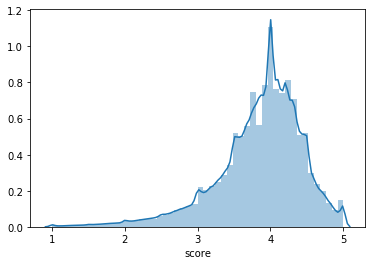

In [170]:
sns.distplot(df_with_mins['score'])

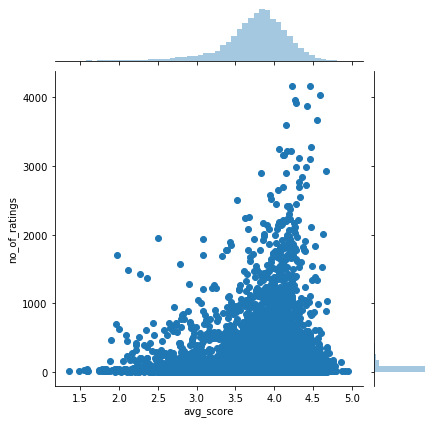

In [186]:
# It seems like the more reviews a beer has, the higher it's rating
sns.jointplot(x='avg_score', y='no_of_ratings', data = ratings)

In [202]:
review_matrix = df_with_mins.pivot_table(index='username', columns='id', values='score')

In [175]:
review_matrix_0s = review_matrix.fillna(value=0)

In [210]:
review_matrix

id,5,6,7,9,10,14,17,19,20,26,...,364573,364644,365127,365152,365203,366774,366914,367439,367629,368857
username,,,,,,,,,,,,,,,,,,,,,
--Dom--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-DF-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-MK-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Rick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-steve-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zxtwou2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zymurgist12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
review_matrix.iloc[25179:,:20]

id,5,6,7,9,10,14,17,19,20,26,27,29,30,31,32,33,34,35,36,39
username,,,,,,,,,,,,,,,,,,,,
zymurgy4all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zythus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds

In [226]:
u, s, vt = svds(review_matrix, k=200)

In [227]:
remade = u.dot(np.diag(s).dot(vt))

In [228]:
remade_df = pd.DataFrame(remade)

In [229]:
remade_df.iloc[25179:,:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
25179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Enter PySpark

In [18]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
import pyspark as spark
spark = SparkSession.builder.appName('Recommendation_system').getOrCreate()
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

In [30]:
df_spark = df_with_mins[['username', 'id', 'score']]

In [32]:
from pyspark.sql.types import *
mySchema = StructType([StructField('username', StringType(), True),\
                      StructField('id', IntegerType(), True),\
                      StructField('score', FloatType(), True)
                      ])

In [33]:
df_spark = spark.createDataFrame(df_spark, schema=mySchema)

In [36]:
df_spark.show(10)

+---------------+------+-----+
|       username|    id|score|
+---------------+------+-----+
|GratefulBeerGuy|125646| 4.58|
|GratefulBeerGuy| 47678| 3.69|
|GratefulBeerGuy| 71930| 4.37|
|GratefulBeerGuy|326798| 3.99|
|GratefulBeerGuy| 48824| 4.51|
|GratefulBeerGuy|317815|  4.7|
|GratefulBeerGuy|253734| 3.54|
|GratefulBeerGuy|272971| 4.17|
|GratefulBeerGuy| 52204| 3.89|
|GratefulBeerGuy| 58999| 4.15|
+---------------+------+-----+
only showing top 10 rows



In [40]:
indexer = [StringIndexer(inputCol=column, outputCol=column+"_index")\
          for column in list(set(df_spark.columns)-set(['id','score']))]

In [44]:
pipeline = Pipeline(stages=indexer)
transformed = pipeline.fit(df_spark).transform(df_spark)

In [54]:
transformed.show(1)

+---------------+------+-----+--------------+
|       username|    id|score|username_index|
+---------------+------+-----+--------------+
|GratefulBeerGuy|125646| 4.58|         226.0|
+---------------+------+-----+--------------+
only showing top 1 row



In [52]:
(training,test) = transformed.randomSplit([0.8, 0.2])

In [55]:
als=ALS(maxIter=5,regParam=0.09,rank=25,\
        userCol="username_index",itemCol="id",\
        ratingCol="score",coldStartStrategy="drop",
        nonnegative=True)

model=als.fit(training)

In [56]:
evaluator=RegressionEvaluator(metricName="rmse",
                              labelCol="score",
                              predictionCol="prediction")
predictions=model.transform(test)
rmse=evaluator.evaluate(predictions)
print("RMSE="+str(rmse))
predictions.show()

RMSE=0.4387761487455896
+--------------+---+-----+--------------+----------+
|      username| id|score|username_index|prediction|
+--------------+---+-----+--------------+----------+
| trevorwideman|148|  4.1|        1645.0| 3.6135125|
|     86MonteSS|148| 4.26|        3997.0|  3.938325|
|    Alex-Alkis|148| 3.66|        5518.0|  3.587902|
|      Bierguy5|148| 3.71|         392.0| 3.6770785|
|    cypressbob|148| 4.27|        1025.0| 3.7339628|
|      necoadam|148|  3.9|        1460.0| 3.6245174|
|     Billolick|148|  4.3|          31.0| 3.7860997|
|       suspect|148| 3.98|        1650.0| 3.6843185|
|      wspscott|148| 3.98|        1903.0| 3.6197796|
|       ctfixer|148| 3.83|       15655.0| 3.6197736|
|     videofrog|148| 3.46|        5740.0| 3.7746458|
|        tgbljb|148|  4.1|         255.0|  3.868567|
|       fitzy84|148| 3.76|         588.0| 3.6975873|
|barefootbrewer|148| 3.53|         970.0| 3.6689193|
|    Litterbean|148| 3.82|        2559.0| 3.6961546|
|    rajendra82|148|  

In [57]:
user_recs=model.recommendForAllUsers(20).show(10)

+--------------+--------------------+
|username_index|     recommendations|
+--------------+--------------------+
|          1580|[[78820, 4.683604...|
|          4900|[[78820, 4.649618...|
|          5300|[[263446, 4.89176...|
|          6620|[[188570, 4.56724...|
|          7240|[[78820, 4.795804...|
|          7340|[[263446, 4.73977...|
|          7880|[[188570, 4.69310...|
|          9900|[[78820, 4.786258...|
|         12940|[[320826, 4.34229...|
|         13840|[[78820, 4.850885...|
+--------------+--------------------+
only showing top 10 rows



In [71]:
df_spark

DataFrame[username: string, id: int, score: float]

In [72]:
transformed.filter(transformed.username_index == 1580).collect()

[Row(username='hoppytobehere', id=209768, score=4.039999961853027, username_index=1580.0),
 Row(username='hoppytobehere', id=179231, score=3.5299999713897705, username_index=1580.0),
 Row(username='hoppytobehere', id=58610, score=3.2799999713897705, username_index=1580.0),
 Row(username='hoppytobehere', id=147163, score=4.389999866485596, username_index=1580.0),
 Row(username='hoppytobehere', id=118922, score=3.130000114440918, username_index=1580.0),
 Row(username='hoppytobehere', id=55564, score=4.210000038146973, username_index=1580.0),
 Row(username='hoppytobehere', id=68916, score=4.0, username_index=1580.0),
 Row(username='hoppytobehere', id=74986, score=4.170000076293945, username_index=1580.0),
 Row(username='hoppytobehere', id=208580, score=4.570000171661377, username_index=1580.0),
 Row(username='hoppytobehere', id=204737, score=4.300000190734863, username_index=1580.0),
 Row(username='hoppytobehere', id=76816, score=4.019999980926514, username_index=1580.0),
 Row(username='h

In [73]:
df_with_mins.loc[df_with_mins.username == 'hoppytobehere']

,id,username,date,text,look,smell,taste,feel,overall,score,...,country,style,availability,abv,notes,retired,avg_score,no_of_ratings,tot_usr_rvw,avg_usr_score
929597,209768,hoppytobehere,2016-02-19,On tap at Ocelot. Pretty much Ocelot's vers...,4.00,4.25,4.00,3.75,4.00,4.04,...,US,American Imperial IPA,Rotating,10.8,"CTZ, Simcoe, Mosaic, and Citra hops. Almost 4 ...",f,4.541000,30,283,4.083569
929598,179231,hoppytobehere,2016-03-17,"12 oz. bottle, about 2 months old. One of t...",1.50,3.50,3.75,3.50,3.75,3.53,...,US,American IPA,Rotating,5.0,Fresh grapefruit purée and American Citra hops...,f,3.741587,63,283,4.083569
929599,58610,hoppytobehere,2015-12-27,"12 oz bottle, best by June 9, 2016. This is...",3.00,3.75,3.25,2.50,3.25,3.28,...,US,American IPA,Rotating,5.3,"Truth is, everyone has a birthday. And when yo...",f,4.237367,581,283,4.083569
929600,147163,hoppytobehere,2015-03-15,Out in Summit County with some friends who ...,4.50,4.25,4.50,4.50,4.25,4.39,...,US,Belgian Saison,Rotating,6.5,Brewed with fresh Glenwood Springs honey.,f,4.311190,42,283,4.083569
929601,118922,hoppytobehere,2016-08-15,12 oz bottle dated 7/20/2016 For a fresh IP...,3.25,3.25,3.00,3.50,3.00,3.13,...,US,American IPA,Rotating,6.5,"Neon Gypsy, our 6.5% abv India Pale Ale, is me...",f,3.624578,83,283,4.083569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929875,209635,hoppytobehere,2017-08-02,"16 oz can, a few weeks old This is my first...",4.00,4.25,4.50,3.75,4.25,4.29,...,US,New England IPA,Rotating,7.0,An intensified version of Scaled and the lates...,f,4.435075,134,283,4.083569
929876,45653,hoppytobehere,2014-06-28,"375 ml bottled on 02/11/2014 A: Dark brown,...",4.50,4.50,4.75,4.50,4.50,4.60,...,US,American Wild Ale,Rotating,10.0,Belgian-style dark ale aged in American oak Ca...,f,4.391668,1241,283,4.083569
929877,95068,hoppytobehere,2017-03-05,"500ml bottle, about 10 days old. Maine Beer...",4.50,4.00,4.75,5.00,4.50,4.53,...,US,American IPA,Year-round,7.0,"Intensely hoppy American IPA, brewed as the li...",f,4.271983,348,283,4.083569
929878,94350,hoppytobehere,2013-10-14,12 oz. bottle with blue wax. Purchased this...,4.25,4.25,4.50,4.50,4.50,4.43,...,US,American Imperial Stout,Rotating,13.0,"Imperial stout aged on coffee, cacao nibs, van...",f,4.489420,1344,283,4.083569


In [77]:
df_with_mins.loc[(df_with_mins.id == 78820) &
                 (df_with_mins.username == 'hoppytobehere')]

,id,username,date,text,look,smell,taste,feel,overall,score,...,country,style,availability,abv,notes,retired,avg_score,no_of_ratings,tot_usr_rvw,avg_usr_score


# SURPRISE!

In [16]:
from surprise import SVD, Dataset, accuracy, BaselineOnly, Reader, KNNWithMeans, KNNBasic, NormalPredictor
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV


In [18]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_with_mins[['username', 'id', 'score']], reader)

In [7]:
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([0.82078556, 0.82089804]),
 'test_mae': array([0.64423915, 0.64462767]),
 'fit_time': (1.5025660991668701, 1.746577262878418),
 'test_time': (13.734639883041382, 13.622498035430908)}

In [8]:
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.2)

# Using Surprise's SVD model
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.4176


0.4176179664313986

In [22]:
# the below grid search took approx. 35 minutes on my local machine

In [21]:
# Grid Search with SVD
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.01, 0.02, 0.05]}
# n_jobs = -1 means all CPUs are used
gs_svd = GridSearchCV(SVD, param_grid=params, n_jobs=-1)
gs_svd.fit(data)

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [23]:
gs_svd.best_score

{'rmse': 0.41700608248568993, 'mae': 0.3004385131027207}

In [24]:
gs_svd.best_params

{'rmse': {'n_factors': 20, 'reg_all': 0.02},
 'mae': {'n_factors': 20, 'reg_all': 0.02}}

In [19]:
from collections import defaultdict
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [22]:
# data = Dataset.load_builtin('ml-100k')
kf = KFold(n_splits=5)
algo = SVD(n_factors= 20, reg_all= 0.02)

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.8461048966133514
0.6109419519941139
0.8479944642884715
0.6065592587991627
0.8489979074633782
0.6061698923908522
0.849095162839698
0.6045587366176766
0.8478737233054745
0.6061159508458794


In [13]:
## initial precision is 84.4% @ 4 threshold 
## initial recall is 60.3%

In [11]:
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=3, threshold=4)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.85113597829772
0.5564351610076419
0.8516489468715588
0.5574528691862015
0.8546299728193647
0.5563633435798762
0.8526478013722949
0.5556468332305075
0.8535121860809837
0.5587337491038415


In [12]:
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=1, threshold=4.2)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.8725612864358867
0.416955261708527
0.8732499186008652
0.41931504911418854
0.8752033465024401
0.4142961992715554
0.8769593563601055
0.4163484091693998
0.8720363754465735
0.41649688013289793


In [14]:
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=2, threshold=4.2)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.8653846153846154
0.47870502795835224
0.8607783040772732
0.47983708308674244
0.8623810628916222
0.4778360003516069
0.8555354491462509
0.475358267588718
0.8650208623087622
0.4804781728619339


In [23]:
# How is A/P when predicting many beers?
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=200, threshold=4.2)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.8417833042567067
0.5741418353351058
0.8392608934914009
0.5775020095683373
0.8411224324468395
0.5745121131406904
0.8444484991484762
0.5710475480114924
0.8420634931791121
0.5718250826241201


In [24]:
# How is A/P when predicting many beers?
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=400, threshold=4.2)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.8444730616602255
0.5732823095187002
0.8403560218806236
0.573975935190377
0.8374350457545446
0.5761747928630964
0.8439675033302813
0.5724977487038385
0.8434622351920594
0.5740606661551941


Looking at all users, instead of the 2STD subgroup. Not expecting it to improve scores but thought I should check

In [17]:
reader = Reader(rating_scale=(1, 5))
data2 = Dataset.load_from_df(df_all_users[['username', 'id', 'score']], reader)
trainset, testset = train_test_split(data2, test_size=.2)

# Using Surprise's SVD model
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.4228


0.4228178144431961

### Trying KNN

In [ ]:
# this hurts the computer
knn_means = KNNWithMeans(k=10, sim_options={'name':'pearson', 'user_based':True})
cv_knn_means = cross_validate(knn_means, data, n_jobs=-1)

//anaconda3/envs/sklearn-env/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


## There are other models too: https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

## Let's make some functions to spit out location based results

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_with_mins[['username', 'id', 'score']], reader)
trainset, testset = train_test_split(data, test_size=.2)
algo = SVD(n_factors= 20, reg_all= 0.02)
algo.fit(trainset)

In [ ]:
uid = str('GratefulBeerGuy')
iid = 265678

In [66]:
pred = algo.predict(uid, iid, verbose = True)

user: GratefulBeerGuy item: 265678     r_ui = None   est = 4.12   {'was_impossible': False}


In [37]:
data.raw_ratings

[('GratefulBeerGuy', 125646, 4.58, None),
 ('GratefulBeerGuy', 47678, 3.69, None),
 ('GratefulBeerGuy', 71930, 4.37, None),
 ('GratefulBeerGuy', 326798, 3.99, None),
 ('GratefulBeerGuy', 48824, 4.51, None),
 ('GratefulBeerGuy', 317815, 4.7, None),
 ('GratefulBeerGuy', 253734, 3.54, None),
 ('GratefulBeerGuy', 272971, 4.17, None),
 ('GratefulBeerGuy', 52204, 3.89, None),
 ('GratefulBeerGuy', 58999, 4.15, None),
 ('GratefulBeerGuy', 61577, 3.76, None),
 ('GratefulBeerGuy', 67760, 4.59, None),
 ('GratefulBeerGuy', 69522, 4.76, None),
 ('GratefulBeerGuy', 252546, 4.4, None),
 ('GratefulBeerGuy', 163693, 3.42, None),
 ('GratefulBeerGuy', 122334, 4.11, None),
 ('GratefulBeerGuy', 255975, 4.43, None),
 ('GratefulBeerGuy', 178857, 4.07, None),
 ('GratefulBeerGuy', 135684, 3.96, None),
 ('GratefulBeerGuy', 159480, 4.8, None),
 ('GratefulBeerGuy', 286228, 4.03, None),
 ('GratefulBeerGuy', 80702, 4.5, None),
 ('GratefulBeerGuy', 350683, 3.49, None),
 ('GratefulBeerGuy', 291168, 4.0, None),
 ('Gra

In [68]:
# how to inpute new ratings
user_rating = [{'userId': 1000, 'movieId': 55245, 'rating': '5'},
 {'userId': 1000, 'movieId': 2491, 'rating': '4'},
 {'userId': 1000, 'movieId': 4718, 'rating': '4'},
 {'userId': 1000, 'movieId': 5990, 'rating': '3'},
 {'userId': 1000, 'movieId': 277, 'rating': '0.5'}             ]

## add the new ratings to the original ratings DataFrame
new_ratings_df = reviews.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

In [67]:
# making predictions for a user

list_of_user_recs = []
for u_id in reviews['userId'].unique():
    list_of_movies = []
#     list_of_views = []
    for m_id in reviews['movieId'].unique():
#         list_of_views.append(m_id)
        list_of_movies.append( (m_id,svd_.predict(u_id,m_id)[3]))
    ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)
    mids = [x[0] for x in ranked_movies]
    top5 = mids[:5]
#     print(top5)
    list_of_user_recs.append(top5)
#     list_of_user_views.append(list_of_views)
#     print(f'user {u_id} done')
#     print(list_of_views)

list_of_recs = []
for u_id in reviews['userId'].unique():
    for m_id in reviews['movieId'].unique():
        single_user_recs = []
        rec = svd_.predict(u_id,m_id)[3]
        single_user_recs.append((m_id,rec))
        ranked_list = sorted(single_user_recs, key=lambda x:x[1], reverse=True)
        print(ranked_list)
    list_of_recs.append(single_user_recs)